## Zipf's Law
This Notebook is the use of Zipf's law on the Quran

In [15]:
import numpy as np
import pandas as pd
import oj_scripts as oj
import importlib
import collections
import matplotlib.pyplot as plt

from spacy.lang.ar import Arabic
from spacy.lang.ar.stop_words import STOP_WORDS


In [2]:
importlib.reload(oj) # need to reload script everytime a change is made to it

<module 'oj_scripts' from 'C:\\Users\\doaa\\Documents\\Git\\ML-Quran\\oj_scripts.py'>

In [3]:
Quran_df = oj.Quran()

In [4]:
Quran_df

,Surah Name,Surah Number,Verse Number,Verse Text
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,الفاتحة,1,3,الرَّحْمَنِ الرَّحِيمِ
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...,...
6231,الناس,114,2,مَلِكِ النَّاسِ
6232,الناس,114,3,إِلَهِ النَّاسِ
6233,الناس,114,4,مِنْ شَرِّ الْوَسْوَاسِ الْخَنَّاسِ
6234,الناس,114,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ


In [5]:
cleaned = oj.cleaner(Quran_df['Verse Text'])

In [6]:
Quran_df["Clean Text"] = cleaned

In [7]:
Quran_df

,Surah Name,Surah Number,Verse Number,Verse Text,Clean Text
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ,بسم الله الرحمن الرحيم
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,الحمد لله رب العالمين
2,الفاتحة,1,3,الرَّحْمَنِ الرَّحِيمِ,الرحمن الرحيم
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ,مالك يوم الدين
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,اياك نعبد واياك نستعين
...,...,...,...,...,...
6231,الناس,114,2,مَلِكِ النَّاسِ,ملك الناس
6232,الناس,114,3,إِلَهِ النَّاسِ,اله الناس
6233,الناس,114,4,مِنْ شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,من شر الوسواس الخناس
6234,الناس,114,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ,الذي يوسوس في صدور الناس


## Stopwords

In [18]:
# Ayahs = list(Quran_df['Clean Text'])
# words = sum([word.split() for word in Ayahs], [])
# len(words)

one_str = Quran_df['Clean Text'].str.cat(sep=' ')

In [21]:
nlp = Arabic()

my_doc = nlp(one_str)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)


# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(token_list[20:40])
print(filtered_sentence[20:40]) 

['صراط', 'الذين', 'انعمت', 'عليهم', 'غير', 'المغضوب', 'عليهم', 'ولا', 'الضالين', 'الم', 'ذلك', 'الكتاب', 'لا', 'ريب', 'فيه', 'هدي', 'للمتقين', 'الذين', 'يءمنون', 'بالغيب']
['انعمت', 'عليهم', 'المغضوب', 'عليهم', 'الضالين', 'الم', 'الكتاب', 'ريب', 'هدي', 'للمتقين', 'يءمنون', 'بالغيب', 'ويقيمون', 'الصلاه', 'ومما', 'رزقناهم', 'ينفقون', 'يءمنون', 'انزل', 'اليك']


## lemma

In [60]:
my_text = nlp(' '.join(filtered_sentence))

tmp = []
for w in my_text:
    tmp.append([w.text, w.lemma_])

lemma = pd.DataFrame(tmp, columns=['text', 'lemma'])
lemma.head()

,text,lemma
0,بسم,
1,الله,
2,الرحمن,
3,الرحيم,
4,الحمد,


In [63]:
lemma.iloc[0]

text     بسم
lemma       
Name: 0, dtype: object

In [27]:
#  words = sum([word.split() for word in Ayahs], [])
words = sum([word.split() for word in filtered_sentence], [])

## frequencies

In [28]:
word_frequencies = collections.Counter(words)

In [44]:
frequencies = word_frequencies.most_common(20000)

In [45]:
zipf_table = []

top_frequency = frequencies[0][1]

for index, item in enumerate(frequencies, start=1):

    relative_frequency = "1/{}".format(index)
    percent_cover = item[1] / len(words)
    zipf_frequency = top_frequency * (1 / index)
    difference_actual = item[1] - zipf_frequency
    difference_percent = (item[1] / zipf_frequency) * 100

    zipf_table.append({"word": item[0],
                       "actual_frequency": item[1],
                       "percent_cover" : percent_cover,
                       "relative_frequency": relative_frequency,
                       "zipf_frequency": zipf_frequency,
                       "difference_actual": difference_actual,
                       "difference_percent": difference_percent})



In [46]:
len(STOP_WORDS), len(words)

(381, 53896)

In [47]:
zipf = pd.DataFrame(zipf_table)
print(zipf.shape[0])
zipf.head(n=25)

14434


,word,actual_frequency,percent_cover,relative_frequency,zipf_frequency,difference_actual,difference_percent
0,الله,2155,0.039984,1/1,2155.000000,0.000000,100.000000
1,قل,294,0.005455,1/2,1077.500000,-783.500000,27.285383
2,الارض,287,0.005325,1/3,718.333333,-431.333333,39.953596
3,امنوا,263,0.004880,1/4,538.750000,-275.750000,48.816705
4,قالوا,250,0.004639,1/5,431.000000,-181.000000,58.004640
5,والله,240,0.004453,1/6,359.166667,-119.166667,66.821346
6,كانوا,229,0.004249,1/7,307.857143,-78.857143,74.385151
7,انا,222,0.004119,1/8,269.375000,-47.375000,82.412993
8,ربك,220,0.004082,1/9,239.444444,-19.444444,91.879350
9,عليهم,214,0.003971,1/10,215.500000,-1.500000,99.303944


In [49]:
zipf['percent_cover'].iloc[:500].sum()
# zipf.head(20)

0.4465637524120528

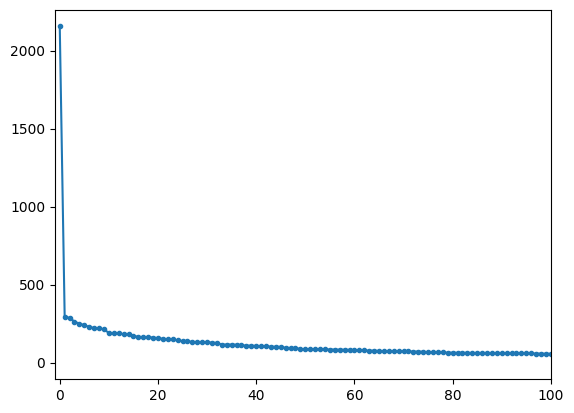

In [32]:
plt.plot(zipf['actual_frequency'].values, 'o-', ms = 3)
plt.xlim(-1,100)
plt.show()

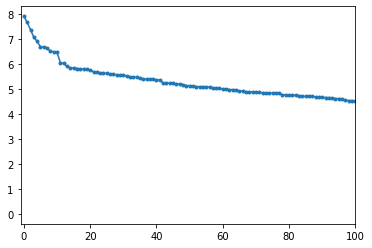

In [46]:
plt.plot(np.log(zipf['actual_frequency'].values), 'o-', ms = 3)
plt.xlim(-1,100)
plt.show()